## Help your hedge fund manager!

You have two datasets at your disposal: `Balance_Sheet.xlsx` and `Income_Statement.xlsx`. Both these datasets have three columns in common:
- `"Company"`: The company's ticker name.
- `"comp_type"` The type of industry the company in question belongs to. It is either `"tech"` for companies in the technology industry, `"fmcg"` for companies in the fast-moving consumer goods industry, and `"real_est"` for companies in the real estate industry. 
- `"Year"`: The year the company's information is from.

The rest of the columns in the datasets contain information from the financial statement of the `"Company"` in question. Note that the columns in `Balance_Sheet.xlsx` only contain financial information from the balance sheet. Similarly, the columns in `Income_Statement.xlsx` only contain financial information from the income statement. The columns are named accordingly. For instance, the column `"Total Liab"` from `Balance_Sheet.xlsx` is the total liability.

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import pandas as pd

In [21]:
#Reading the balance_sheet file
file_path = 'data/Balance_Sheet.xlsx'
if os.path.exists(file_path):
    df_balance=pd.read_excel(file_path)
    print("Balance sheet File read Successfully")
    print(df_balance.head())
else:
    print("File not found")

Balance sheet File read Successfully
   Unnamed: 0  Year  ...    Total Liab Total Stockholder Equity
0           0  2019  ...  248028000000              90488000000
1           1  2020  ...  258549000000              65339000000
2           2  2021  ...  287912000000              63090000000
3           3  2022  ...  302083000000              50672000000
4           4  2019  ...  184226000000             102330000000

[5 rows x 14 columns]


In [22]:
#Reading the Income statement file
file_path = 'data/Income_Statement.xlsx'
if os.path.exists(file_path):
    df_income = pd.read_excel(file_path)
    print("Income file read successfully")
    print(df_income.head())
else:
    print("File not found")

Income file read successfully
   Unnamed: 0  Year  ... Total Operating Expenses Total Revenue
0           0  2019  ...             196244000000  260174000000
1           1  2020  ...             208227000000  274515000000
2           2  2021  ...             256868000000  365817000000
3           3  2022  ...             274891000000  394328000000
4           4  2019  ...              82884000000  125843000000

[5 rows x 9 columns]


In [23]:
#Merging the files
df_ratios = pd.merge(df_income, df_balance,on =["Year","company","comp_type"])
print(df_ratios)

    Unnamed: 0_x  Year  ...    Total Liab Total Stockholder Equity
0              0  2019  ...  248028000000              90488000000
1              1  2020  ...  258549000000              65339000000
2              2  2021  ...  287912000000              63090000000
3              3  2022  ...  302083000000              50672000000
4              4  2019  ...  184226000000             102330000000
5              5  2020  ...  183007000000             118304000000
6              6  2021  ...  191791000000             141988000000
7              7  2022  ...  198298000000             166542000000
8              8  2018  ...   55164000000             177628000000
9              9  2019  ...   74467000000             201442000000
10            10  2020  ...   97072000000             222544000000
11            11  2021  ...  107633000000             251635000000
12            12  2018  ...  119099000000              43549000000
13            13  2019  ...  163188000000              6206000

A debt-to-equity ratio or an equity multiplier ratio. Save this ratio in a column named `"leverage_ratio"` in a DataFrame called `df_ratios`

`Debt-to-equality ratio` is a measure of risk factor of the company's assets financed through stockholder's equity
`Lower ratio is better`

In [24]:
#Debt-to-eqaulity ratio
df_ratios["leverage_ratio"]= df_ratios["Total Assets"]/df_ratios["Total Stockholder Equity"]
print(df_ratios.head())

   Unnamed: 0_x  Year  ... Total Stockholder Equity leverage_ratio
0             0  2019  ...              90488000000       3.741004
1             1  2020  ...              65339000000       4.957039
2             2  2021  ...              63090000000       5.563512
3             3  2022  ...              50672000000       6.961537
4             4  2019  ...             102330000000       2.800313

[5 rows x 21 columns]


A gross margin ratio or an operating margin ratio. Save this ratio in a column named `"profitability_ratio"`, in a DataFrame called `df_ratios`

Gross Margin Ratio or profitability ratio = (Total Revenue - Cost of Goods Sold)/Total Revenue

In [25]:
#Compute gross margin ratio
df_ratios["profitability_ratio"] = (df_ratios["Total Revenue"] - df_ratios["Cost Of Goods Sold"])/df_ratios["Total Revenue"]
print(df_ratios.head())

   Unnamed: 0_x  Year  ... leverage_ratio profitability_ratio
0             0  2019  ...       3.741004            0.378178
1             1  2020  ...       4.957039            0.382332
2             2  2021  ...       5.563512            0.417794
3             3  2022  ...       6.961537            0.433096
4             4  2019  ...       2.800313            0.659020

[5 rows x 22 columns]


Which company type `(comp_type)` has the lowest profitability ratio? Save this comp_type value as a string in a variable called `lowest_profitability`.

In [26]:
print(df_ratios.pivot_table(index="comp_type", values="profitability_ratio"))

           profitability_ratio
comp_type                     
fmcg                  0.514396
real_est              0.534848
tech                  0.572062


In [27]:
lowest_profitability = "fmcg"

Which company type has the highest leverage ratio? Save this `comp_type` value as a string in a variable called `highest_leverage`.

In [28]:
print(df_ratios.pivot_table(index="comp_type", values = "leverage_ratio"))

           leverage_ratio
comp_type                
fmcg             4.049784
real_est         7.353476
tech             2.777448


In [29]:
highest_leverage = "real_est"

What is the relationship between leverage and profitability in the real estate companies represented in this data? Is it "positive," "negative," or "no relationship?" Save one of these three strings in a variable called `relationship`.

Text(0.5, 1.0, 'Relationship between leverage and profitability for real estate companies')

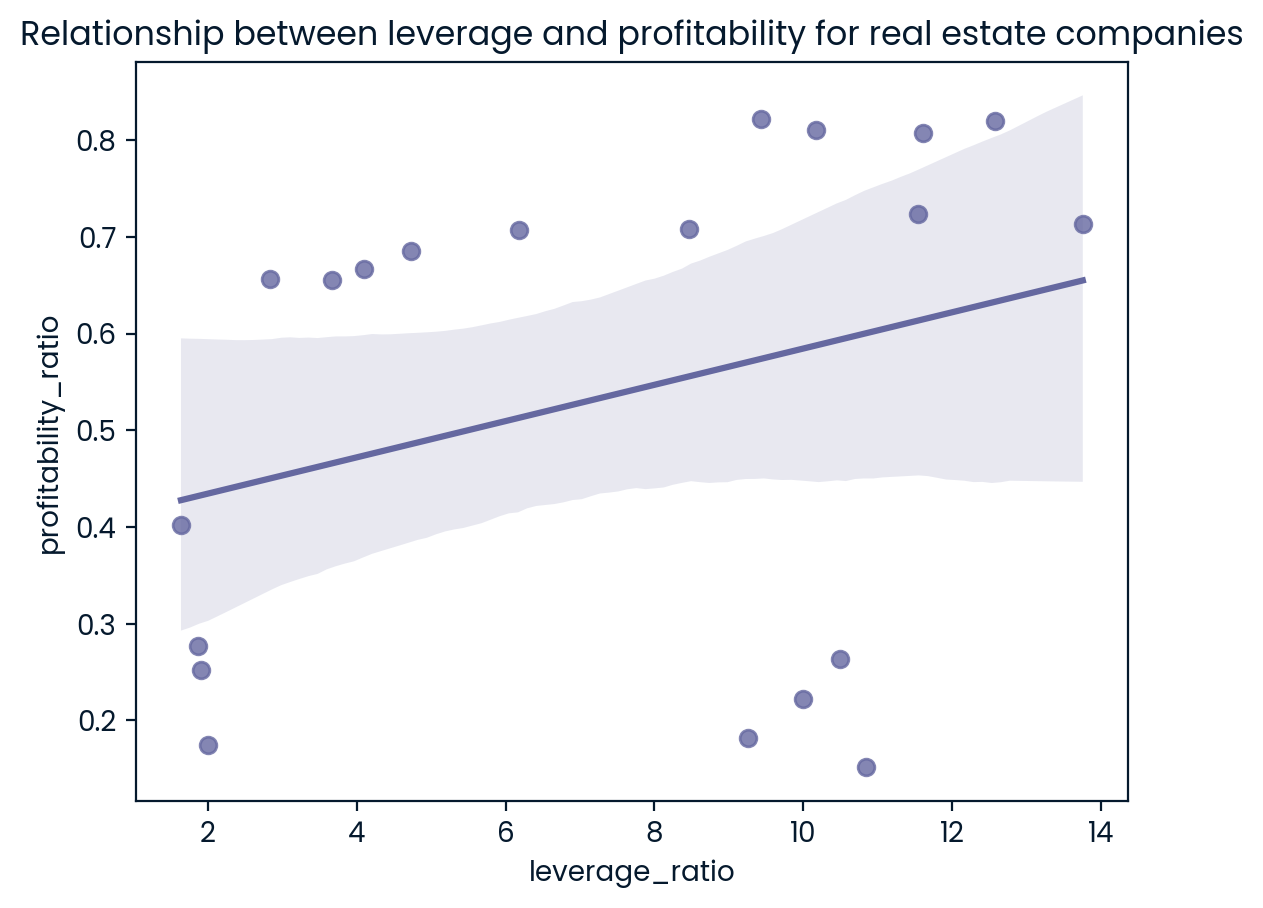

In [32]:
df_real_estate = df_ratios.loc[df_ratios["comp_type"]=="real_est"]
plot = sns.regplot(data=df_real_estate, x = "leverage_ratio", y ="profitability_ratio")
plot.set_title('Relationship between leverage and profitability for real estate companies')

In [31]:
relationship = "postive"